# Schwarzschild Metric 

In [1]:
%display latex

In [2]:
Man = Manifold(4, 'M', r'\mathcal{M}')

In [3]:
BL.<t,r,th,ph> = Man.chart(r't r:(0,+oo) th:(0,pi):\theta ph:(0,2*pi):\phi')

In [4]:
var('M')
g = Man.lorentzian_metric('g')
g[0,0] = (1-2*M/r)
g[1,1] = -1/(1-2*M/r)
g[2,2] = -r^2
g[3,3] = -r^2*sin(th)^2
show(g.display())
show(g[:])

g = (-2*M/r + 1) dt*dt + 1/(2*M/r - 1) dr*dr - r^2 dth*dth - r^2*sin(th)^2 dph*dph

[    -2*M/r + 1              0              0              0]
[             0  1/(2*M/r - 1)              0              0]
[             0              0           -r^2              0]
[             0              0              0 -r^2*sin(th)^2]

In [5]:
nab = g.connection()
show(nab.display(only_nonredundant=true))

Gam^t_t,r = -M/(2*M*r - r^2) 
Gam^r_t,t = -(2*M^2 - M*r)/r^3 
Gam^r_r,r = M/(2*M*r - r^2) 
Gam^r_th,th = 2*M - r 
Gam^r_ph,ph = (2*M - r)*sin(th)^2 
Gam^th_r,th = 1/r 
Gam^th_ph,ph = -cos(th)*sin(th) 
Gam^ph_r,ph = 1/r 
Gam^ph_th,ph = cos(th)/sin(th)

In [6]:
Ric = nab.ricci()
show(Ric.display())

Ric(g) = 0

In [7]:
R = g.ricci_scalar('R')
show(R.display())

R: M --> R
   (t, r, th, ph) |--> 0

In [8]:
ET = Ric - 1/2*g*R
ET.set_name(r'G_{\mu\nu}')
show(ET.display())

G_{\mu\nu} = 0

In [12]:
var('eta, m, E, L, S, HJfull');
F = function('F')(r);
G = function('G')(th);
ginv = g.inverse();


In [13]:
S = ((eta*m^2)/2 - E*t + L*ph + F+G)

In [14]:
HJfull = 0;
l = len(BL[:])
for i in range(l):
    for j in range(l):
        HJfull += ginv[i,j].expr()*diff(S, BL[i])*diff(S,BL[j])
HJfull = (diff(S,eta)) - 1/2 * HJfull;
show(HJfull)

1/2*m^2 + 1/2*E^2*r/(2*M - r) - 1/2*(2*M - r)*diff(F(r), r)^2/r + 1/2*diff(G(th), th)^2/r^2 + 1/2*L^2/(r^2*sin(th)^2)

In [15]:
geodeqnrhs = zero_vector(SR, l)

for mu in range(l):
    for nu in range(l):
        geodeqnrhs[mu] -= ginv[mu,nu].expr()*diff(S,BL[nu]);
show(geodeqnrhs)

(-E*r/(2*M - r), -(2*M - r)*diff(F(r), r)/r, diff(G(th), th)/r^2, L/(r^2*sin(th)^2))

In [16]:
var('HJst')
HJst = (HJfull.subs(diff(G)==0)).subs(th=pi/2)
show(HJst)

1/2*m^2 + 1/2*E^2*r/(2*M - r) - 1/2*(2*M - r)*diff(F(r), r)^2/r + 1/2*L^2/r^2

In [17]:
geodeqnrhsst = (geodeqnrhs.subs(diff(G)==0)).subs(th=pi/2);
show(geodeqnrhsst)

(-E*r/(2*M - r), -(2*M - r)*diff(F(r), r)/r, 0, L/r^2)

In [19]:
var('m_aux, L_aux, E_aux, M_aux, r_init, ph_init, eta_end, step_size');

In [86]:
m_aux = 0
M_aux = 10
L_aux = 23
E_aux = 0.4429
step_size = 1
eta_end = 10000
r_init = 10*M_aux
ph_init = 0.3

In [87]:
derofradfun = solve(HJst, diff(F,r))
geodeqn1 = ((geodeqnrhsst[1]/geodeqnrhsst[0]).subs(diff(F,r)==derofradfun[1].rhs())).subs(E=E_aux, L=L_aux, m=m_aux, M=M_aux);
geodeqn2 = ((geodeqnrhsst[3]/geodeqnrhsst[0]).subs(E=E_aux, L=L_aux, m=m_aux, M=M_aux));

In [88]:
sol = desolve_odeint([geodeqn1, geodeqn2], [r_init, ph_init], srange(0,eta_end,step_size), [r,ph])

In [91]:
show(sol)

array([[  1.00000000e+02,   3.00000000e-01],
       [  1.00709693e+02,   3.04128813e-01],
       [  1.01421821e+02,   3.08206874e-01],
       ..., 
       [  9.98628078e+03,   8.36214144e-01],
       [  9.98727876e+03,   8.36214664e-01],
       [  9.98827675e+03,   8.36215183e-01]])

In [89]:
p = line(zip(sol[:,0]*cos(sol[:,1]),sol[:,0]*sin(sol[:,1])))

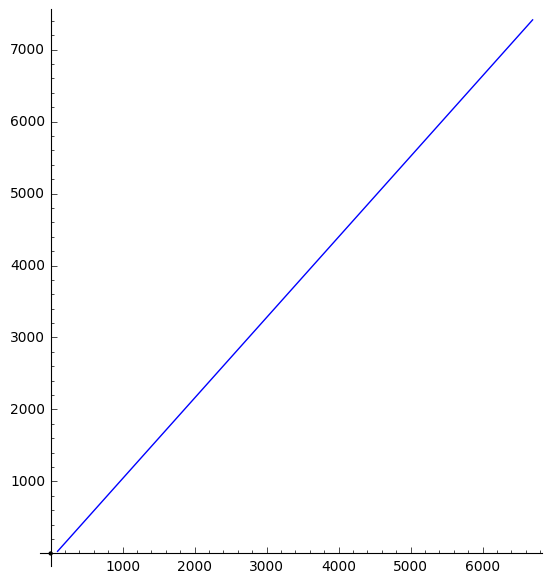

In [90]:
C=circle((0,0), 2*M_aux, fill=True, rgbcolor='black');
show(C+p)